# Assignment 1

## Challenge 3

Problems:

1.   What is the merger time of this signal?
2.   What is the matched-filter SNR of this signal?

Solutions:

1.   We found a signal at 38.56005859375s with SNR 484.76031447807884. Thus, the merger time is around 38.56s.
2.   Thusm the matched-filter SNR of this signal is around 484

### Code for problem 1

Installing pycbc and gwpy module.

In [1]:
# This installs the pycbc and gwpy module to be used
! pip install -q 'lalsuite==6.82' 'PyCBC==1.18.0' 
! pip install -q 'gwpy==2.0.2'

Importing the datafile.

In [2]:
from pycbc.frame import read_frame
import urllib.request

# Function to retrieve the data files
def get_file(fname):
    url = "https://www.gw-openscience.org/s/workshop3/challenge/{}"
    url = url.format(fname) #this finishes the url link to be the link to the file that is wanted
    urllib.request.urlretrieve(url, fname) #this retrieves the file
    print('Getting : {}'.format(url))

# Add here which files you want to get
files = ['challenge3.gwf']

# This will get the files you entered above
for fname in files: 
    get_file(fname)
    
file_name = "challenge3.gwf"
channel_name = "H1:CHALLENGE3"

ts = read_frame(file_name, channel_name)
print(ts.start_time)
print(ts.end_time)

Getting : https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf
0
4096


Let's do an SNR as in challenge 2.4.

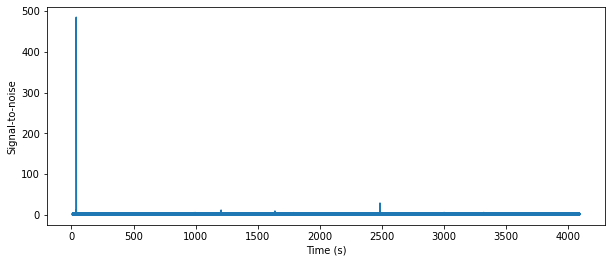

We found a signal at 38.56005859375s with SNR 484.76031447807884


In [3]:
%matplotlib inline
from pycbc.waveform import get_td_waveform
import pylab

from pycbc.frame import frame

Data = frame.read_frame("challenge3.gwf", "H1:CHALLENGE3")

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10, #both m1 and m2 are 30 solar masses
                         delta_t=Data.delta_t,
                         f_lower=10)

from pycbc.psd import interpolate, inverse_spectrum_truncation

psd = Data.psd(4)
psd = interpolate(psd, Data.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * Data.sample_rate),
                                  low_frequency_cutoff=15)

from pycbc.filter import matched_filter
import numpy

hp.resize(len(Data))
template = hp.cyclic_time_shift(hp.start_time)

snr = matched_filter(template, Data,
                     psd=psd, low_frequency_cutoff=20)

snr = snr.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))